In [1]:
import psycopg2
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import rdDepictor, rdMolDraw2D
import mols2grid

opts = Draw.DrawingOptions()
#Draw.SetComicMode(opts)
print(opts)

C:\Users\peter\anaconda3\envs\rdkit\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


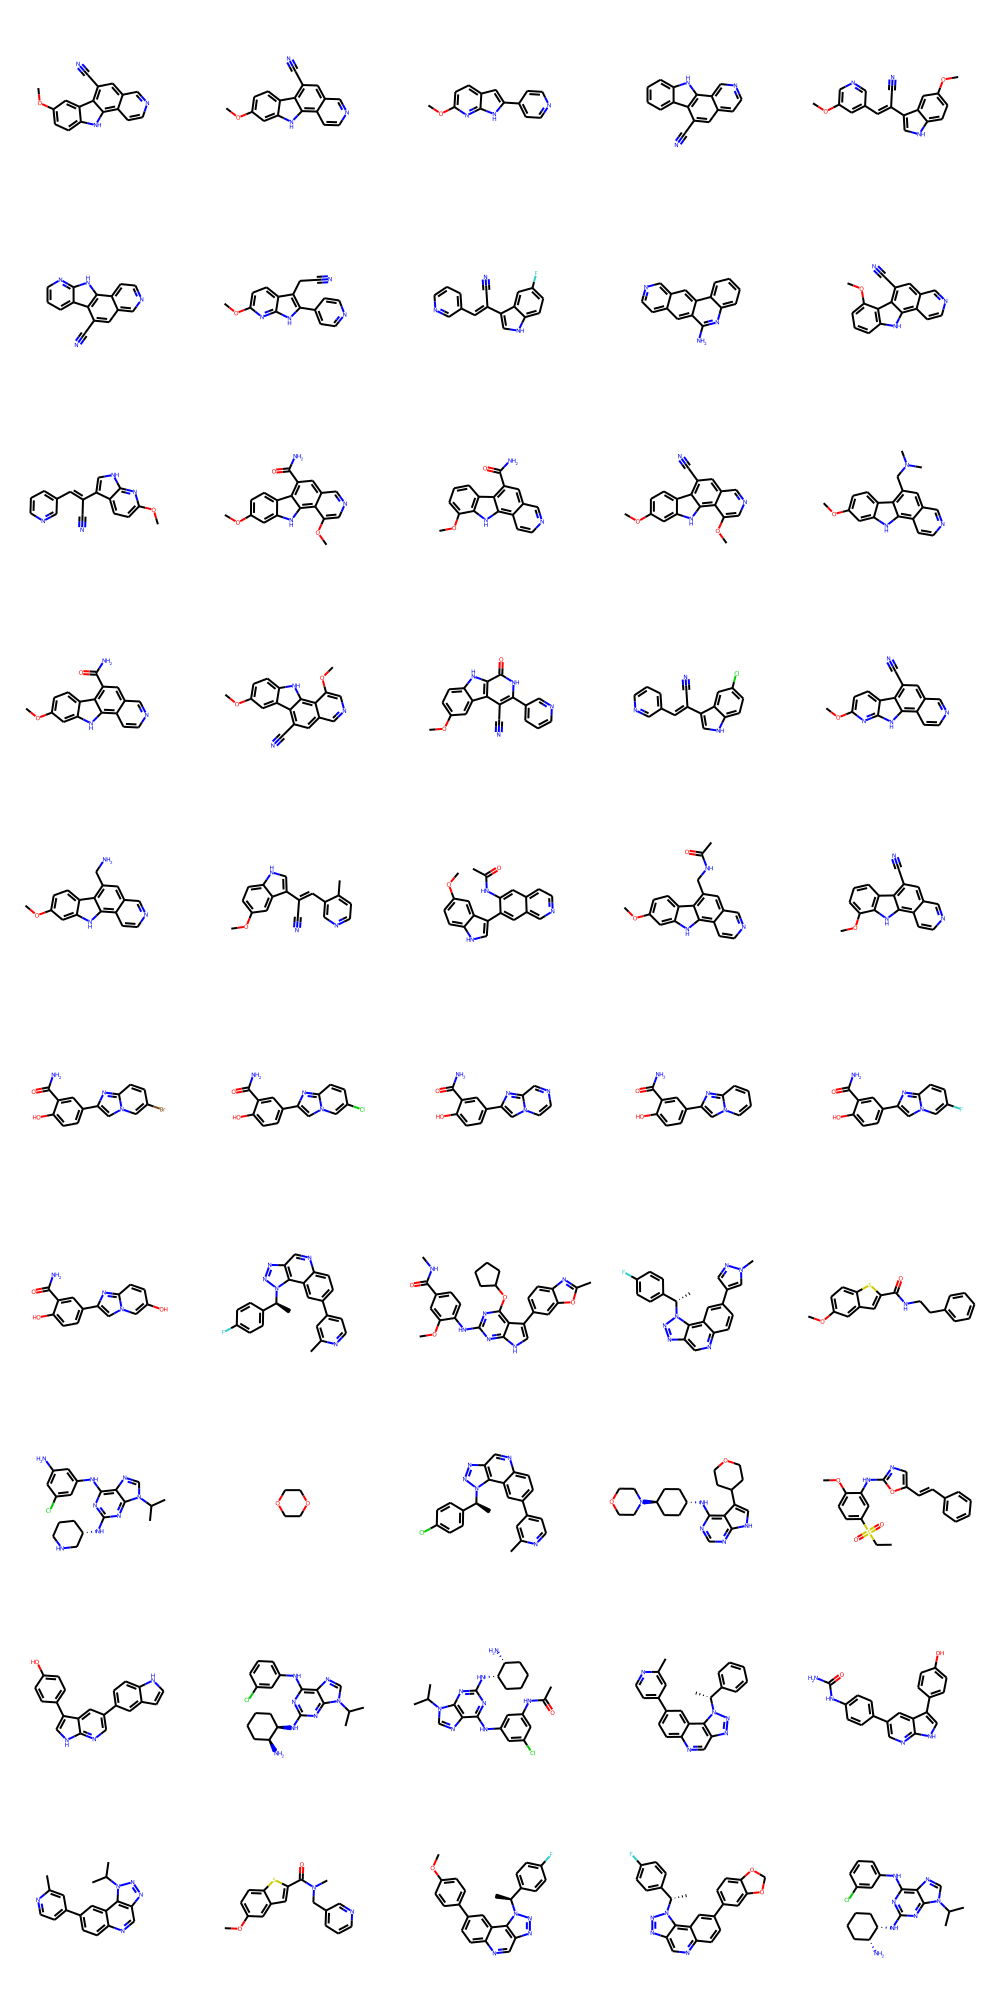

In [2]:
db_chem = psycopg2.connect(host = "192.168.86.31", dbname="Chemistry", user="postgres", password="postgres")
cur = db_chem.cursor()
sql = 'SELECT s.structure_id, s.smiles FROM public.structures s limit 100' 
cur.execute(sql) 
mollist = cur.fetchall()

#print(mollist)

mols  = []

for m in mollist:
    #print()
    #print('Molecule : ',m)
    # print(mol[0], mol[1])
    mols.append(Chem.MolFromSmiles(m[1]))
    
Draw.MolsToGridImage(mols, molsPerRow=5)
#print(mols)

In [3]:
#mols2grid.display(mols,
#                 # RDKit's MolDrawOptions parameters
#                  fixedBondLength=30,
#                  # rename fields for the output document
#                  #subset=['structure_id', 'img','smiles'],
#                  #tooltip=['structure_id'],
#                  MolDrawingOptions=opts,
#                  hover_color = 'blue',
#                  n_cols = 6
#                )

In [4]:


#print(mols2grid.selection)



In [5]:
#print(mollist)

moldf = pd.DataFrame(mollist, columns =['ID', 'SMILES'])
print(moldf)

mols2grid.display(moldf,
                 # RDKit's MolDrawOptions parameters
                  fixedBondLength=30,
                  # rename fields for the output document
                  subset=['ID', 'img', 'SMILES'],
                  tooltip=['SMILES'],
                  MolDrawingOptions=opts,
                  hover_color = 'blue',
                  n_cols = 6
                )

      ID                                             SMILES
0   5505                COc1ccc2[nH]c3c4ccncc4cc(C#N)c3c2c1
1   5506              COc1ccc2c(c1)[nH]c1c3ccncc3cc(C#N)c21
2   5507                      COc1ccc2cc(-c3ccncc3)[nH]c2n1
3   5508                    N#Cc1cc2ccncc2c2[nH]c3ccccc3c12
4   5509         COc1cncc(/C=C(\C#N)c2c[nH]c3ccc(OC)cc23)c1
..   ...                                                ...
95  5596  CC(=O)N1CCN([C@H]2CC[C@H](Nc3ncnn4ccc(C(C)C)c3...
96  5597              COC(=N)c1nc2ccc3ncn(C4CC4)c(=O)c3c2s1
97  5598  COc1ccc2c(c1)CC(n1c(C)nc3ccc(-c4cc(N)nc(N)c4)n...
98  4944                       Oc1cccc(CCc2ccc3c(c2)OCO3)c1
99  5599  CN1CCN(C(=O)c2ccc(NC(=O)Nc3nc4ccc(O)cc4s3)cc2)CC1

[100 rows x 2 columns]


In [6]:
print(mols2grid.selection)

{}


C:\Users\peter\anaconda3\envs\rdkit\lib\site-packages\mols2grid\select.py:102: UserWarning: Accessing the current grid's selection through `mols2grid.selection` is deprecated and will be removed soon. Please use `mols2grid.get_selection()` instead
  "Accessing the current grid's selection through "


In [7]:
#print(mols2grid.utils.mol_to_record(mols[0]))

In [8]:
print(moldf)

      ID                                             SMILES
0   5505                COc1ccc2[nH]c3c4ccncc4cc(C#N)c3c2c1
1   5506              COc1ccc2c(c1)[nH]c1c3ccncc3cc(C#N)c21
2   5507                      COc1ccc2cc(-c3ccncc3)[nH]c2n1
3   5508                    N#Cc1cc2ccncc2c2[nH]c3ccccc3c12
4   5509         COc1cncc(/C=C(\C#N)c2c[nH]c3ccc(OC)cc23)c1
..   ...                                                ...
95  5596  CC(=O)N1CCN([C@H]2CC[C@H](Nc3ncnn4ccc(C(C)C)c3...
96  5597              COC(=N)c1nc2ccc3ncn(C4CC4)c(=O)c3c2s1
97  5598  COc1ccc2c(c1)CC(n1c(C)nc3ccc(-c4cc(N)nc(N)c4)n...
98  4944                       Oc1cccc(CCc2ccc3c(c2)OCO3)c1
99  5599  CN1CCN(C(=O)c2ccc(NC(=O)Nc3nc4ccc(O)cc4s3)cc2)CC1

[100 rows x 2 columns]


In [9]:
#a =mols2grid.selection.keys()

#print(a[0])
a =[]
for i in mols2grid.selection.keys():
    #print(i)
    a.append(i)
    
#print(a)

moldf = moldf.iloc[a]

mols2grid.display(moldf,
                 # RDKit's MolDrawOptions parameters
                  fixedBondLength=30,
                  # rename fields for the output document
                  subset=['ID', 'img'],
                  tooltip=['SMILES'],
                  MolDrawingOptions=opts,
                  hover_color = 'blue',
                  n_cols = 6
                )

C:\Users\peter\anaconda3\envs\rdkit\lib\site-packages\mols2grid\select.py:102: UserWarning: Accessing the current grid's selection through `mols2grid.selection` is deprecated and will be removed soon. Please use `mols2grid.get_selection()` instead
  "Accessing the current grid's selection through "


ValueError: Wrong number of items passed 4, placement implies 1